In [1]:
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from utils import view_random_images, plot_training_curves
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [2]:
data_dir = pathlib.Path('Chicken_Disease_Dataset/train/')
train_dir = 'Chicken_Disease_Dataset/train/'
val_dir = 'Chicken_Disease_Dataset/val/'
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['Coccidiosis' 'Healthy' 'New Castle Disease' 'Salmonella']


Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


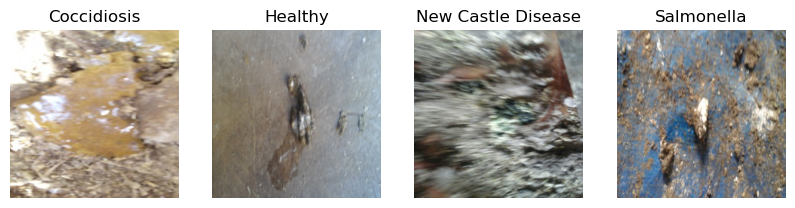

In [3]:
# visualize our data
plt.figure(figsize=(10, 7))
for i, label in enumerate(class_names):
    plt.subplot(1, 4, i+1)
    view_random_images(target_dir=train_dir, target_class=label)

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

val_data = val_datagen.flow_from_directory(val_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 6452 images belonging to 4 classes.
Found 1615 images belonging to 4 classes.


In [12]:
model = Sequential([
  Conv2D(64, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(64, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(50, activation="relu"),
  Dense(50, activation="relu"),
  Dense(4, activation="softmax")
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy'])

In [15]:
# Fit the model with 2x conv layers removed
history = model.fit(train_data,
                        epochs=100,
                        validation_data=val_data)

Epoch 1/100
202/202 [==============================] - 294s 1s/step - loss: 0.3279 - accuracy: 0.8841 - val_loss: 0.2640 - val_accuracy: 0.9115
Epoch 2/100
202/202 [==============================] - 262s 1s/step - loss: 0.3284 - accuracy: 0.8833 - val_loss: 0.2703 - val_accuracy: 0.9034
Epoch 3/100
202/202 [==============================] - 279s 1s/step - loss: 0.3353 - accuracy: 0.8855 - val_loss: 0.2731 - val_accuracy: 0.9077
Epoch 4/100
202/202 [==============================] - 281s 1s/step - loss: 0.3300 - accuracy: 0.8822 - val_loss: 0.2826 - val_accuracy: 0.8941
Epoch 5/100
202/202 [==============================] - 271s 1s/step - loss: 0.3075 - accuracy: 0.8934 - val_loss: 0.3336 - val_accuracy: 0.8972
Epoch 6/100
202/202 [==============================] - 271s 1s/step - loss: 0.2948 - accuracy: 0.8948 - val_loss: 0.2974 - val_accuracy: 0.8954
Epoch 7/100
202/202 [==============================] - 274s 1s/step - loss: 0.3077 - accuracy: 0.8926 - val_loss: 0.2506 - val_accuracy:

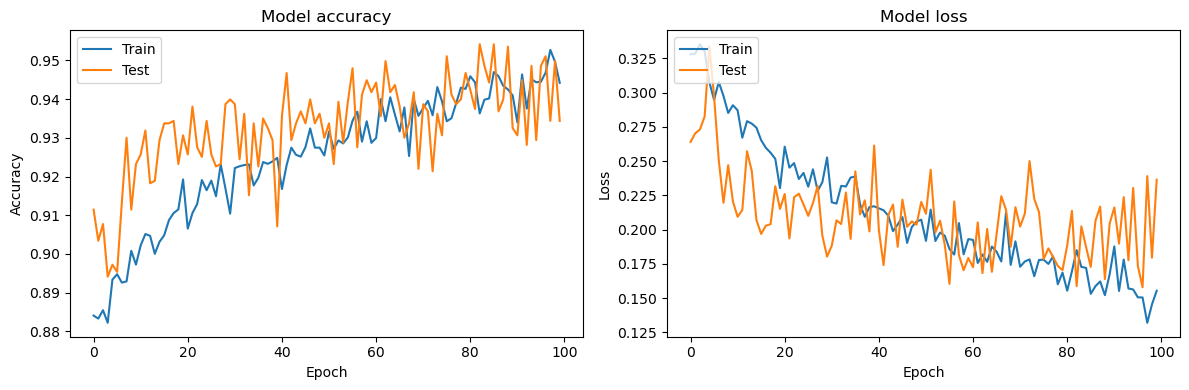

In [16]:
plot_training_curves(history)

In [17]:
model.save("final_model.h5")

In [18]:
model.save("final_model")

INFO:tensorflow:Assets written to: final_model\assets


INFO:tensorflow:Assets written to: final_model\assets
